In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sb

In [2]:
df = pd.read_csv('data/loans.csv')

/homes/nv304/virtpy3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# df.dtypes

## Preprocessing and Data cleaning.
- Remove NANs, if required categorise or bin.
- Find outliers and remove them
- dropping account_id, description, job_title and other str columns

### annual_income
annual_income column consist of values such as '10000.0' and 'GBP 10000.0' converting each of these values into integer.

annual_income
10000.0           57
100000.0        4328
1000000.0          5
100002.0           1
100005.0           1
                ... 
GBP 98000.0        9
GBP 98200.0        1
GBP 98539.65       1
GBP 99000.0        5
GBP 99167.0        1
Name: account_id, Length: 18837, dtype: int64


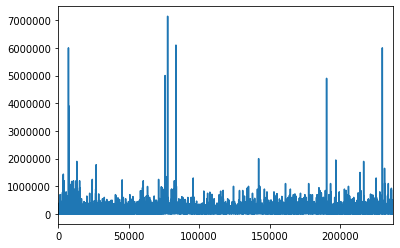

In [4]:
# df['annual_income'] = df["annual_income"].astype('float')
print(df.groupby(['annual_income'])['account_id'].count())

def parse_int(s,sep=' '):
    res = 0
    for i in s.split(str(sep)):
        try:
            result = int(eval(str(i)))
            if type(res) == int:
                res = result
        except:
            pass
    return res
df['annual_income'] = df['annual_income'].apply(lambda x: parse_int(x))
df['annual_income'].plot()

### earliest_credit_line
earliest_credit_line column consists of values such as 'Apr-1980'. These have been first processed as 

- Apr-1980 -> 1980 then

these values ae binned as
- 2010 > as 0
- 2000 > and < 2010 as 1
- 1990 > and < 2000 as 2
- 1980 > and < 1990 as 3
- and others or < 1980 as 4

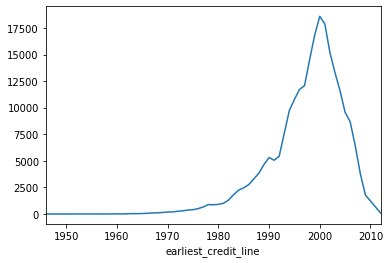

In [5]:
# earliest_credit_line
df.groupby(['earliest_credit_line'])['account_id'].count()
df[df['earliest_credit_line'].isnull()]['account_id'].count()

df['earliest_credit_line'] = df['earliest_credit_line'].apply(lambda x: parse_int(x,'-'))
df.groupby(['earliest_credit_line'])['account_id'].count().plot()

In [6]:
def cat_years(x):
    if x>2010:
        return 0
    elif x > 2000 and x < 2010:
        return 1
    elif x > 1990 and x < 2000:
        return 2
    elif x > 1980 and x < 1990:
        return 3
    else:
        return 4

df['earliest_credit_line'] = df['earliest_credit_line'].apply(lambda x: cat_years(x))
df.groupby(['earliest_credit_line'])['account_id'].count()

earliest_credit_line
0      749
1    88217
2    93735
3    23407
4    31328
Name: account_id, dtype: int64

### year
The year column has values between 2009 and 2015 these have been now been label encoded as 0-6

In [7]:
df.groupby(['year'])['account_id'].count()
df["year"] = df["year"].astype('category')
df["year"] = df["year"].cat.codes
df.groupby(['year'])['account_id'].count()

year
0     4332
1    10536
2    17629
3    44401
4    63486
5    65212
6    31840
Name: account_id, dtype: int64

### employment length
The employment length values start have lables '0 years' to '9 years' and more than or equal 10, ad there are large amount of NANs around 9k. The NANs have been ecategorised into another category as 'unknown' and this category have been label encoded from 0-11.

In [8]:
# employment_length 
df.groupby(['employment_length'])['account_id'].count()
df[df['employment_length'].isnull()]['account_id'].count()
# replace nan values with unknown category as size > 9k
df = df.fillna({"employment_length": "unknown"})
df["employment_length"] = df["employment_length"].astype('category')
df["employment_length"] = df["employment_length"].cat.codes
df.groupby(['employment_length'])['account_id'].count()

employment_length
0     15633
1     72996
2     22127
3     19139
4     15193
5     16851
6     13634
7     13178
8     11138
9      9034
10    19336
11     9177
Name: account_id, dtype: int64

### home_ownership
removed NONE and ANY as their instances are very less and label encoded this column 

In [9]:
# home_ownership
df.groupby(['home_ownership'])['account_id'].count()
df[df['home_ownership'].isnull()]['account_id'].count()
# drop home_ownership = ANY and NONE
df = df[df.home_ownership != 'ANY']
df = df[df.home_ownership != 'NONE']
df["home_ownership"] = df["home_ownership"].astype('category')
df["home_ownership"] = df["home_ownership"].cat.codes
df.groupby(['home_ownership'])['account_id'].count()

home_ownership
0    118540
1       101
2     20843
3     97916
Name: account_id, dtype: int64

### inquiries_6m
combined all the values above 3 into one, as there is a decrease trend with long tail.

inquiries_6m
0.0    118595
1.0     67906
2.0     31615
3.0     19320
Name: account_id, dtype: int64

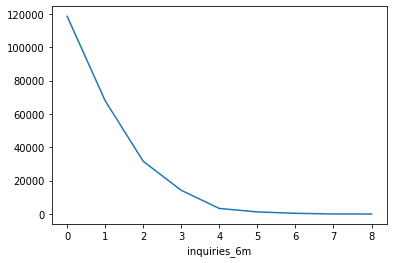

In [5]:
# inquiries_6m
df.groupby(['inquiries_6m'])['account_id'].count().plot()
# df[df['inquiries_6m'].isnull()]['account_id'].count()
# Combining > 3 inquries into 1 category 
df['inquiries_6m'] = df['inquiries_6m'].apply(lambda x: 3.0 if x >= 3.0 else x)
df.groupby(['inquiries_6m'])['account_id'].count()

### last_delinquency_months
This column had 131314 NANs, which cannot be dropped neither we can take mean or median of values, thus all the NANs were given value 0 and all the previous values were shifted by 1 place.

last_delinquency_months
0.0     131314
1.0        156
2.0        660
3.0        845
4.0        977
         ...  
77.0       761
78.0       748
79.0       702
80.0       684
81.0      1762
Name: account_id, Length: 82, dtype: int64

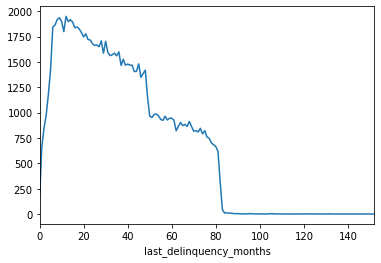

In [11]:
df.groupby(['last_delinquency_months'])['account_id'].count().plot()
df[df['last_delinquency_months'].isnull()]['account_id'].count()
# Combining > 80 last_delinquency_months into 1 category as 81
df['last_delinquency_months'] = df['last_delinquency_months'].apply(lambda x: x+1)
df['last_delinquency_months'] = df['last_delinquency_months'].apply(lambda x: 81.0 if x >= 81.0 else x)
# as nan count > 130k maeking those into anoth category as 82
df = df.fillna({"last_delinquency_months": 0.0})
df.groupby(['last_delinquency_months'])['account_id'].count()

### last_derog_months
This column had 191030 NANs, again these instances cannot be dropped as this is an inportant feature. And as seen from the graph below it has a long tail after value 80, thus I have combined those value into one (81) and for NANs I have set the value to 0 and shifted all the other values by 1.

last_derog_months
0.0     191030
1.0         33
2.0        119
3.0        110
4.0        109
         ...  
77.0       480
78.0       408
79.0       388
80.0       302
81.0      1386
Name: account_id, Length: 82, dtype: int64

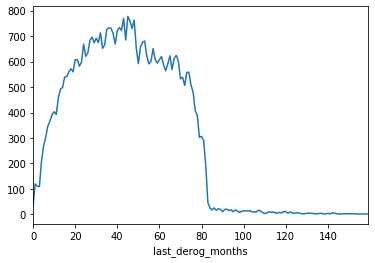

In [12]:
# last_derog_months
df.groupby(['last_derog_months'])['account_id'].count().plot()
df[df['last_derog_months'].isnull()]['account_id'].count()
# Combining > 80 last_delinquency_months into 1 category as 81
df['last_derog_months'] = df['last_derog_months'].apply(lambda x: x+1)
df['last_derog_months'] = df['last_derog_months'].apply(lambda x: 81.0 if x >= 81.0 else x)
# as nan count > 190k making those into anoth category as 82
df = df.fillna({"last_derog_months": 0.0})
df.groupby(['last_derog_months'])['account_id'].count()

### last_record_months
Here we see an outlier, as there is only one record with last_record_month == 120, this record has been set to 119 now and around 207k+ NANs have been given a default value of 120. Other Impuatations techniques are not efficient, and subtituting with mean or median will loose the meaning as there are 207k NANs.

last_record_months
0.0           6
1.0           9
2.0          11
3.0          10
4.0          15
          ...  
116.0       425
117.0       411
118.0       422
119.0       247
120.0    207544
Name: account_id, Length: 121, dtype: int64

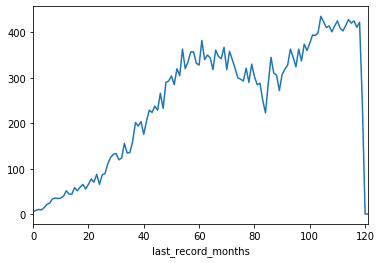

In [13]:
# last_record_months
df.groupby(['last_record_months'])['account_id'].count().plot()
df[df['last_record_months'].isnull()]['account_id'].count()
# Combining > 119 last_delinquency_months into 1 category as 119
df['last_record_months'] = df['last_record_months'].apply(lambda x: 119.0 if x >= 119.0 else x)
# as nan count > 200k making those into anoth category as 120
df = df.fillna({"last_record_months": 120.0})
df.groupby(['last_record_months'])['account_id'].count()

### open_accounts
As we see below, there are jsut 45 accounts with 1 open accounts, I have combined these values to 2.0 Removed the accounts with 0 accounts and there is a long tail, thus I have combined values which are above 19 into another category 20.

open_accounts
2.0      1124
3.0      3209
4.0      6936
5.0     11723
6.0     16586
7.0     19695
8.0     21697
9.0     22697
10.0    21520
11.0    19737
12.0    17371
13.0    14625
14.0    12287
15.0     9942
16.0     8257
17.0     6454
18.0     5297
19.0     4231
20.0    14044
Name: account_id, dtype: int64

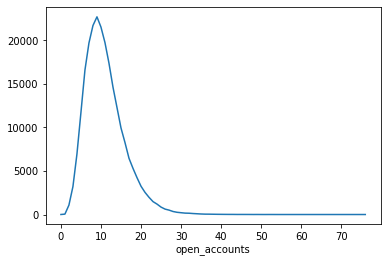

In [6]:
# open_accounts
df.groupby(['open_accounts'])['account_id'].count().plot()
df.groupby(['open_accounts'])['account_id'].count()
# df[df['open_accounts'].isnull()]['account_id'].count()
# remove 0 open_account rows
df = df[df.open_accounts != 0.0]

df['open_accounts'] = df['open_accounts'].apply(lambda x: 2.0 if x <= 1.0 else x)
# combine the accounts which are above 19 as the count drops drastically
df['open_accounts'] = df['open_accounts'].apply(lambda x: 20.0 if x > 19.0 else x)
df.groupby(['open_accounts'])['account_id'].count()

### public_records
Below we see a long tail of values which are geater than 3, thus I ahve combined these values into another category and named it 4. 

public_records
0.0    207543
1.0     26266
2.0      2515
3.0       697
4.0       375
Name: account_id, dtype: int64

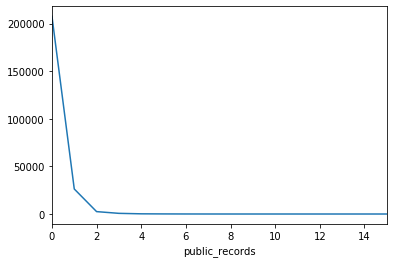

In [15]:
# public_records
df.groupby(['public_records'])['account_id'].count().plot()
df.groupby(['public_records'])['account_id'].count()
# for records greater than 4 combine
df['public_records'] = df['public_records'].apply(lambda x: 4.0 if x > 3.0 else x)
df.groupby(['public_records'])['account_id'].count()

### purpose
I have label encoded all the categories into integer values. There are such 13 categories in which people take loan.

purpose
0       3415
1      47819
2     139508
3        236
4      14260
5       1514
6       5919
7       2601
8       1834
9      12913
10       229
11      3957
12      1485
13      1742
Name: account_id, dtype: int64

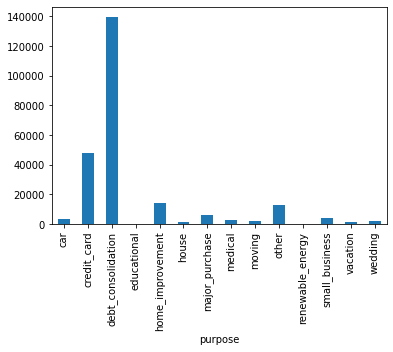

In [8]:
# purpose
df.groupby(['purpose'])['account_id'].count().plot(kind='bar')
df[df['purpose'].isnull()]['account_id'].count()
df["purpose"] = df["purpose"].astype('category')
df["purpose"] = df["purpose"].cat.codes
df.groupby(['purpose'])['account_id'].count()

### credit_card_usage
Here, we observe some outliers, which I have removed. Since the count of values is so high, that there is little impact of that outlier on the mean, but the mean changes. Also there are some 169 NANs, which I ahve kept marking the values of such records as 0.  

In [17]:
# credit_card_usage
df.groupby(['credit_card_usage'])['account_id'].count()
# df['credit_card_usage'].plot()
print(df['credit_card_usage'].describe())
df = df.loc[df['credit_card_usage']!=df['credit_card_usage'].max()]
print(df['credit_card_usage'].describe())
df[df['credit_card_usage'].isnull()]['account_id'].count()
# 169 nan values. replacing with 0
df = df.fillna({"credit_card_usage": 0.0})

count    237227.000000
mean         53.933289
std          24.767086
min           0.000000
25%          35.800000
50%          55.300000
75%          73.400000
max         892.300000
Name: credit_card_usage, dtype: float64
count    237226.000000
mean         53.929755
std          24.707252
min           0.000000
25%          35.800000
50%          55.300000
75%          73.400000
max         153.000000
Name: credit_card_usage, dtype: float64


### term
I have label encoded the term values.

term
0    185773
1     51659
Name: account_id, dtype: int64

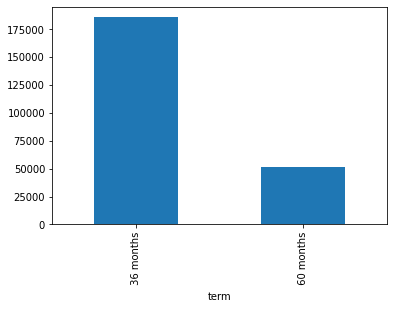

In [9]:
# term
df.groupby(['term'])['account_id'].count().plot(kind='bar')
df[df['term'].isnull()]['account_id'].count()
df["term"] = df["term"].astype('category')
df["term"] = df["term"].cat.codes
df.groupby(['term'])['account_id'].count()

### nr_accounts
As seen from the graph below, there is a long tail of values after 50, thus I have combined those values. And I have combined the smaller values into one category.

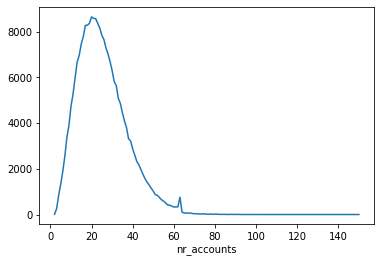

In [10]:
# nr_accounts
df.groupby(['nr_accounts'])['account_id'].count().plot()
df.groupby(['nr_accounts'])['account_id'].count()
# combine nr_record = 2.0 to 3.0 and records greater than 50 to 51
df['nr_accounts'] = df['nr_accounts'].apply(lambda x: 3.0 if x <= 2.0 else x)
df['nr_accounts'] = df['nr_accounts'].apply(lambda x: 51.0 if x > 50.0 else x)
# df.groupby(['nr_accounts'])['account_id'].count()

### total_current_balance
There are some 55590 NANs, and these values are too large to be dropped off, and we cannot set these values to 0 as it will not make sense, thus I have imputed these values with mean of other values in the column. 

nan counts 55590


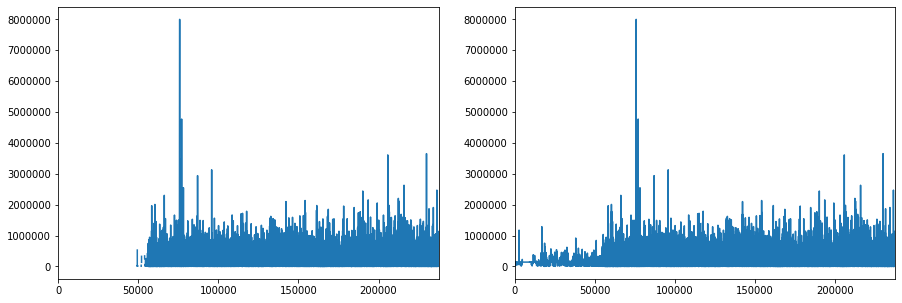

In [20]:
# total_current_balance
print("nan counts",df[df['total_current_balance'].isnull()]['account_id'].count())
#high nan count, replacing with mean
fig, axs = plt.subplots(1,2,figsize=(15,5))
df['total_current_balance'].plot(ax=axs[0])
df['total_current_balance'].fillna((df['total_current_balance'].mean())).plot(ax=axs[1])
df['total_current_balance'] = df['total_current_balance'].fillna((df['total_current_balance'].mean()))

### district
Geographical could mean something if given to the models, thus I have label encoded these and the nan values.

district
0      1279
1      1918
2       255
3       484
4       456
       ... 
378     666
379     314
380     379
381    1127
382     888
Name: account_id, Length: 383, dtype: int64

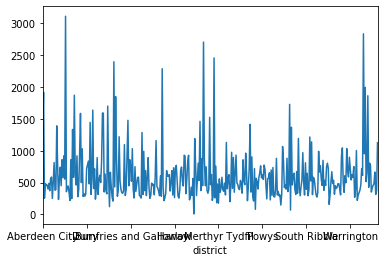

In [21]:
# district
df.groupby(['district'])['account_id'].count().plot()
df[df['district'].isnull()]['account_id'].count()
# converting 888 NANs to unknown district
df = df.fillna({"district": 'unkown'})
# converting these into categories.
df["district"] = df["district"].astype('category')
df["district"] = df["district"].cat.codes
df.groupby(['district'])['account_id'].count()

### loan_status
Combining 'Charged off' and 'Default' as bad_loan (1) and 'Fully Paid' as (0) and keeping 'Late (> 90 days)' and 'Ongoing' as 2 aside for predicting/inference

In [22]:
print(df.groupby(['loan_status'])['account_id'].count())
df["loan_status"] = df["loan_status"].astype('category')
df["loan_status"] = df["loan_status"].cat.codes
print(df.groupby(['loan_status'])['account_id'].count())

def get_ytrue(x):
    if x == 0 or x == 1:
        return 1
    if x == 2:
        return 0
    if x == 3 or x == 4:
        return 2

df['loan_status'] = df['loan_status'].apply(lambda x: get_ytrue(x))
df.groupby(['loan_status'])['account_id'].count()

loan_status
Charged Off          14953
Default               1219
Fully Paid          206165
Late (> 90 days)      9297
Ongoing               5761
Name: account_id, dtype: int64
loan_status
0     14953
1      1219
2    206165
3      9297
4      5761
Name: account_id, dtype: int64


loan_status
0    206165
1     16172
2     15058
Name: account_id, dtype: int64

### Other Columns with dtype string

- issue_date is dropped in favor of year
- account_id as this information is irrelevant to the model.
- postcode_district, dropped in favor of district
- job_title, there are lot of NANs, future scope of NER and important phrase extraction can be done
- title, there are lot of NANs, future scope of NER and important phrase extraction can be done
- description, there are lot of NANs, future scope of NER and important phrase extraction can be done

The above str columns, job_title, title, description can be used to find common phrases and for these phrases, word embeddings can be applied which can be used as another feature.

In [23]:
df = df.drop(['issue_date'], axis=1)
df = df.drop(['account_id'],axis=1)
df = df.drop(['job_title'],axis=1)
df = df.drop(['title'],axis=1)
df = df.drop(['postcode_district'],axis=1)
df = df.drop(['description'], axis=1)

In [24]:
df.shape

(237395, 26)

In [25]:
df.describe()

,installment,loan_amount,interest_rate,term,purpose,home_ownership,annual_income,employment_length,earliest_credit_line,public_records,last_record_months,last_delinquency_months,last_derog_months,delinquency_2y,inquiries_6m,open_accounts,debt_to_income,credit_card_usage,credit_card_balance,total_current_balance,nr_accounts,loan_status,amount_payed,year,district,credit_score
count,237395.000000,237395.000000,237395.000000,237395.000000,237395.000000,237395.000000,2.373950e+05,237395.000000,237395.000000,237395.000000,237395.000000,237395.000000,237395.000000,237395.000000,237395.000000,237395.000000,237395.000000,237395.000000,2.373950e+05,2.373950e+05,237395.000000,237395.000000,237395.000000,237395.000000,237395.000000,237395.000000
mean,419.157920,13606.008025,13.573666,0.217591,2.792772,1.413349,7.354933e+04,4.036808,1.984541,0.146958,114.518962,16.166335,8.640439,0.256113,0.796457,10.798425,16.527606,53.891362,1.528588e+04,1.405628e+05,24.976891,0.194983,14038.479086,4.001377,186.814213,550.466943
std,245.265153,8143.662130,4.367879,0.412609,2.543745,1.437383,5.755961e+04,3.405895,1.005112,0.427928,17.483744,23.087015,19.815510,0.755780,0.957440,4.372366,7.811221,24.740306,1.904590e+04,1.352500e+05,11.160823,0.532753,9547.726621,1.409435,114.099624,200.149081
min,19.870000,1000.000000,5.320000,0.000000,0.000000,0.000000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,0.000000,0.000000,0.000000,-345.011615
25%,240.920000,7375.000000,10.490000,0.000000,2.000000,0.000000,4.500000e+04,1.000000,1.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,8.000000,10.720000,35.700000,5.866000e+03,3.815600e+04,17.000000,0.000000,6752.795000,3.000000,83.000000,415.646396
50%,365.590000,12000.000000,13.330000,0.000000,2.000000,2.000000,6.300000e+04,3.000000,2.000000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,10.000000,16.140000,55.200000,1.093900e+04,1.405628e+05,24.000000,0.000000,11917.262193,4.000000,183.000000,550.474866
75%,547.950000,18400.000000,16.290000,0.000000,2.000000,3.000000,8.900000e+04,7.000000,2.000000,0.000000,120.000000,29.000000,0.000000,0.000000,1.000000,14.000000,21.960000,73.400000,1.914600e+04,1.714325e+05,32.000000,0.000000,19227.281019,5.000000,287.000000,685.369254
max,1409.990000,35000.000000,28.990000,1.000000,13.000000,3.000000,7.141778e+06,11.000000,4.000000,4.000000,120.000000,81.000000,81.000000,29.000000,3.000000,20.000000,57.140000,153.000000,1.743266e+06,8.000078e+06,51.000000,2.000000,57777.579870,6.000000,382.000000,1409.030401


In [26]:
# checking if there are any NAN values or Nones
df[df.isnull().any(axis=1)]

,installment,loan_amount,interest_rate,term,purpose,home_ownership,annual_income,employment_length,earliest_credit_line,public_records,last_record_months,last_delinquency_months,last_derog_months,delinquency_2y,inquiries_6m,open_accounts,debt_to_income,credit_card_usage,credit_card_balance,total_current_balance,nr_accounts,loan_status,amount_payed,year,district,credit_score


In [28]:
df.to_csv('stage1_loans.csv', index=False)